# Task 1

In [7]:
import sys
sys.path.insert(0, '/Users/laerte/pam_ai/pam_ai/src')
import random
import matplotlib.pyplot as plt
import numpy as np

from Task_1.agent import GameAgent
from Task_1.grid import GameGrid
from Task_1.simple_search import SimpleSearch

### Initialise the objects

Initiate the grid with given dimesions

In [3]:
# The object game_agent is employed to store agent position and the overall value of game movements
ag = GameAgent(0,0)

# Generate a 5 x 10 grid
gd = GameGrid(5,10)
gd.generate_grid()
print(gd.grid)

# Store the grid in a variable random_grid
#random_grid = gd.grid

[[5 1 5 5 7 5 2 1 2 0]
 [1 8 8 1 3 5 7 7 4 4]
 [4 7 2 3 5 4 1 5 0 4]
 [6 0 3 6 0 4 3 0 0 6]
 [5 1 5 8 5 3 3 7 4 5]]


In [4]:
simple_search = SimpleSearch(ag,gd)
simple_search.compute_path()

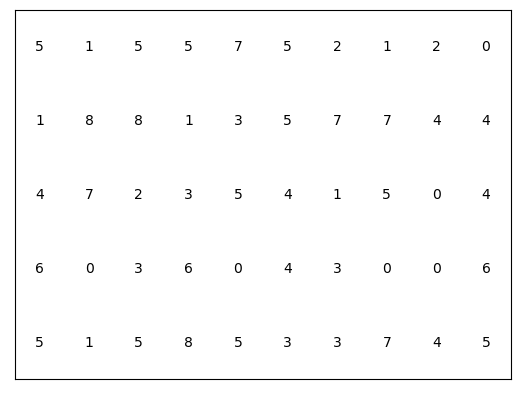

In [49]:
fig, ax = plt.subplots()

min_val, max_val = 0, 10

for i in range(gd.grid.shape[0]-1,-1,-1):
    for j in range(gd.grid.shape[1]):
        c = gd.grid[i][j]    
        ax.text(j+0.5, gd.grid.shape[0]-i-0.5, str(c), va='center', ha='center')


ax.set_xlim(min_val, gd.grid.shape[1])
ax.set_ylim(min_val, gd.grid.shape[0])
ax.set_xticks(np.arange(gd.grid.shape[1]+1))
ax.set_yticks(np.arange(gd.grid.shape[0]+1))
plt.xticks(color='w') 
plt.yticks(color='w') 
ax.grid()     


import matplotlib.ticker as ticker

ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())
ax.grid()

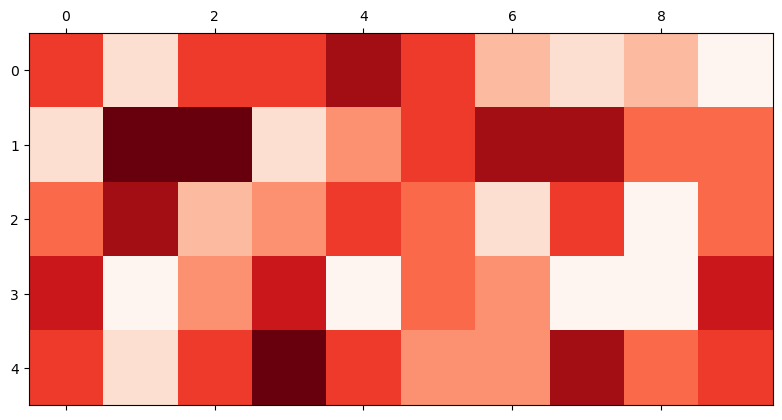

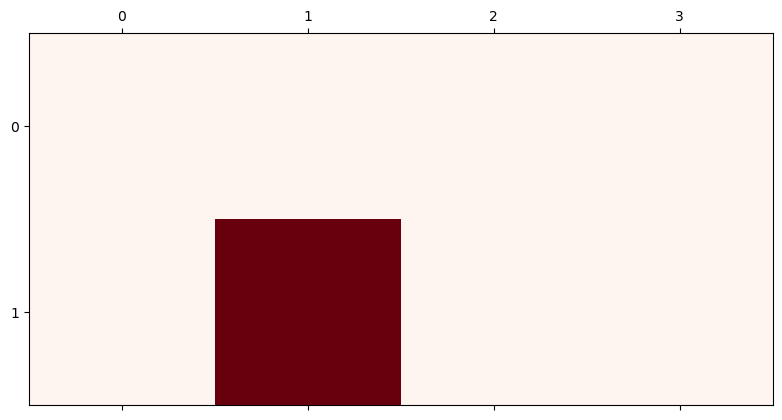

In [11]:
ag.path

plt.matshow(gd.grid,cmap=plt.cm.Reds)



test = np.array([[0,0,0,0],[0,1,0,0]])

plt.matshow(test,cmap=plt.cm.Reds)





Struttura di esempio: 

- inizializza il tutto
- fai un loop, magari con il while
- per ogni step, valuta la direzione con .evaluate_direction
- muoviti e aggiorna posizione e somma totale 